In [4]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import cv2
import json
from os import chdir
from matplotlib.pyplot import gca

In [5]:
#Paramaters to choose
path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_0/image_2019-04-30_18-50-03.jpg"
color_rectangles="White"
r=2

In [6]:
#Parametre par defaut
path_prem="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_0/image_2019-04-30_18-48-06.jpg"
path_prem="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/positions/image_2019-04-30_18-48-06.jpg"
imagettes=pd.read_csv("/mnt/VegaSlowDataDisk/c3po/Images_aquises/imagettes.csv")



#For the second and third function
camera_to_map_convertor_file="/mnt/VegaSlowDataDisk/c3po_interface/code/positions/reperes.json"
camera_to_map_convertor_path="/home/marcpozzo/Desktop/c3po_interface_mark/Materiels/positions/"

chdir(camera_to_map_convertor_path)

camera_to_map_convertor_file="/home/marcpozzo/Desktop/c3po_interface_mark/Materiels/positions/fichier_reference.json"
#camera_to_map_convertor_file="/mnt/VegaSlowDataDisk/c3po/codePython/position_pi.json"



liste_name_test=list(set(imagettes["filename"]))
dic_count={}

for name_test in liste_name_test:
    dic_count[name_test]=len(imagettes[imagettes["filename"]==name_test])

In [7]:
## Many birds

"""
dic_count
#La premiere pas mal
#image_2019-04-30_18-54-30.jpg
image_2019-05-29_19-50-43.jpg'

image_2019-04-06_19-50-19.jpg'
image_2019-04-19_17-38-41.jpg
image_2019-04-06_19-50-02.jpg
"""

"\ndic_count\n#La premiere pas mal\n#image_2019-04-30_18-54-30.jpg\nimage_2019-05-29_19-50-43.jpg'\n\nimage_2019-04-06_19-50-19.jpg'\nimage_2019-04-19_17-38-41.jpg\nimage_2019-04-06_19-50-02.jpg\n"

In [65]:
#Start of Function asking for filename
def Projection(userpoints): 
    print('Enter JSON file')                                   
    
#initializing arrays for storing coordinates    
    mapcoord= []
    shotcoord= []

#Commmented out print commands were for checking that data were being read correctly.                                                                               
#This digs into the json to seperate out the map and shot data.
    with open(input()) as json_file:
        data = json.load(json_file)                                                                                                             
        mapdata = (data['map'])
        mapmarkers = (mapdata['markers'])
        shotdata= (data['shot'])
        shotmarkers=(shotdata['markers'])
        #print (mapmarkers)
       
 #This extracts coordinates from json file and puts them in their respective arrays.       
        for p in mapmarkers:
            #print ('Id: ' + p['id'])
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                mapcoord.append(coord)
        #print(mapcoord)
        
        for p in shotmarkers:
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                shotcoord.append(coord)
        #print(shotcoord)
    
# This pairs the lat and lng of the map coordinates
    map_pair=[]
    
    for i in range(0,len(mapcoord),2):
        test=[]
        test.append(mapcoord[i])
        test.append(mapcoord[i+1])
        map_pair.append(test)
    
# This pairs the lat and lng of the shot coordinates    
    shot_pair=[]
    for i in range(0,len(shotcoord),2):
        test=[]
        test.append(shotcoord[i])
        test.append(shotcoord[i+1])
        shot_pair.append(test)
            
#This creates the projection matrix for the transformation       
    projection =  cv2.findHomography(np.float32([shot_pair[:4]]).reshape(4, 1, -1), np.float32([map_pair[:4]]).reshape(4, 1, -1))[0]

#This creates a test projection using the fifth paired map and shot point   
    Testpoint = cv2.perspectiveTransform(np.float32([shot_pair[4]]).reshape(1, 1, -1), projection)
 
#This shows the user the test and the actual point it should map to, so they may check for error  
    print('The following is an actual map point and its projected map point from the shot.\nEnsure that they are acceptable.')
    print(np.float32([map_pair[4]]).reshape(1, 1, -1))
    print(Testpoint)
    
#This projects the user coordinates
    projected_coord=[]
    for i in userpoints:
        user_projection = cv2.perspectiveTransform(np.float32([i]).reshape(1, 1, -1), projection)
        user_projection=user_projection[0]
        user_projection=user_projection[0]
        #print(user_projection)
        projected_coord.extend(user_projection)
        
#This repairs the projected coordinates
    projection_pairs=[]
    for i in range(0,len(projected_coord),2):
        test=[]
        test.append(projected_coord[i])
        test.append(projected_coord[i+1])
        projection_pairs.append(test)    
   
    
    return(projection_pairs)


#Create a projection matrix to learn how to convert camera coordonates into map coordonates
def get_Projection(camera_to_map_convertor_file): 
                                    
#initializing arrays for storing coordinates    
    mapcoord= []
    shotcoord= []

#Commmented out print commands were for checking that data were being read correctly.                                                                               
#This digs into the json to seperate out the map and shot data.
    with open(camera_to_map_convertor_file) as json_file:
        data = json.load(json_file)                                                                                                             
        mapdata = (data['map'])
        mapmarkers = (mapdata['markers'])
        shotdata= (data['shot'])
        shotmarkers=(shotdata['markers'])
        #print (mapmarkers)
       
 #This extracts coordinates from json file and puts them in their respective arrays.       
        for p in mapmarkers:
            #print ('Id: ' + p['id'])
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                mapcoord.append(coord)
        #print(mapcoord)
        
        for p in shotmarkers:
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                shotcoord.append(coord)
        #print(shotcoord)
    
# This pairs the lat and lng of the map coordinates
    map_pair=[]
    
    for i in range(0,len(mapcoord),2):
        test=[]
        test.append(mapcoord[i])
        test.append(mapcoord[i+1])
        map_pair.append(test)
    
# This pairs the lat and lng of the shot coordinates    
    shot_pair=[]
    for i in range(0,len(shotcoord),2):
        test=[]
        test.append(shotcoord[i])
        test.append(shotcoord[i+1])
        shot_pair.append(test)
            
#This creates the projection matrix for the transformation       
    projection =  cv2.findHomography(np.float32([shot_pair[:4]]).reshape(4, 1, -1), np.float32([map_pair[:4]]).reshape(4, 1, -1))[0]

    return  projection
    
    
#Apply the projection  to a set of points from the camera coordonate to get the map coordonates
def apply_projection(userpoints,projection):
    
    print("les positions en vue caméra sont :",userpoints )
    
#This projects the user coordinates
    projected_coord=[]
    for i in userpoints:
        user_projection = cv2.perspectiveTransform(np.float32([i]).reshape(1, 1, -1), projection)
        user_projection=user_projection[0]
        user_projection=user_projection[0]
        #print(user_projection)
        projected_coord.extend(user_projection)
        
#This repairs the projected coordinates
    projection_pairs=[]
    for i in range(0,len(projected_coord),2):
        test=[]
        test.append(projected_coord[i])
        test.append(projected_coord[i+1])
        projection_pairs.append(test)    
   
    print("les coordonnées en vue aérienne sont : ",projection_pairs)
    return projection_pairs    



def draw_rectangle(table,color,image_name):

    for i in range(len(table)):
        xmin=table["xmin"].iloc[i]
        ymin=table["ymin"].iloc[i]
        xmax=table["xmax"].iloc[i]
        ymax=table["ymax"].iloc[i]
        
        if color=="Blue":
            cv2.rectangle(image_name, (xmin,ymin), (xmax,ymax), (255, 0,0), 2) 
        if color=="Green":
            cv2.rectangle(image_name, (xmin,ymin), (xmax,ymax), (0, 255,0), 2) 
        if color=="Red":
            cv2.rectangle(image_name, (xmin,ymin), (xmax,ymax), (255, 255,255), 2)
        if color=="White":
            cv2.rectangle(image_name, (xmin,ymin), (xmax,ymax), (255, 255,255), 2)
        
    return image_name


def display_pic(path,color):
    liste_coord=[]
    liste_colors=["White","Red","Blue"]
    
    #Get Centers of birds images
    prem=cv2.imread(path)
    pic_selec=path.split("/")[-1]
    print(pic_selec)
    imagettes_fold=imagettes.copy()
    imagettes_fold=imagettes_fold[imagettes_fold["classe"]!="ground"]
    imagettes_fold=imagettes_fold[imagettes_fold["filename"]==pic_selec]
    imagettes_fold["x_center"]=(imagettes_fold["xmax"]+imagettes_fold["xmin"])/2
    imagettes_fold["y_center"]=(imagettes_fold["ymax"]+imagettes_fold["ymin"])/2
    
    
    #Transform the coordonates in list of list of list
    for line in range(len(imagettes_fold)):
        X=[imagettes_fold["x_center"].iloc[line]]
        Y=[imagettes_fold["y_center"].iloc[line]]
        liste_coord.append([X,Y])
    
    #Plot picture with birds squred
    imageRectangle=prem.copy()
    
    for i in range(3):
        imageRectangle=draw_rectangle(imagettes_fold,liste_colors[i],imageRectangle)

    plt.figure(figsize=(15,15))
    plt.imshow(imageRectangle);
    
    return liste_coord


def draw_map(map_coordonates,r):
    xmin,xmax,ymin,ymax =[[] for i in range(4)]
    image_map=cv2.imread("/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/positions/SIC.png")
    
    for coord in map_coordonates:
        x_center=round(coord[0])
        y_center=round(coord[1])
        xmin.append(x_center-r)
        xmax.append(x_center+r)
        ymin.append(y_center-r)
        ymax.append(y_center+r)

    df=pd.DataFrame({"xmin":xmin,"xmax":xmax,"ymin":ymin ,"ymax":ymax })
    df=df.astype(int)

    image_map_rect=image_map.copy()    
    image_map_rect=draw_rectangle(df,"White",image_map_rect)
    plt.figure(figsize=(15,15))
    plt.imshow(image_map_rect)



    

image_2019-04-30_18-50-03.jpg
les positions en vue caméra sont : [[[901.0], [496.5]], [[1178.0], [556.0]], [[1196.0], [676.5]]]
les coordonnées en vue aérienne sont :  [[346.449, 283.3761], [411.8171, 275.99216], [396.60443, 309.62384]]


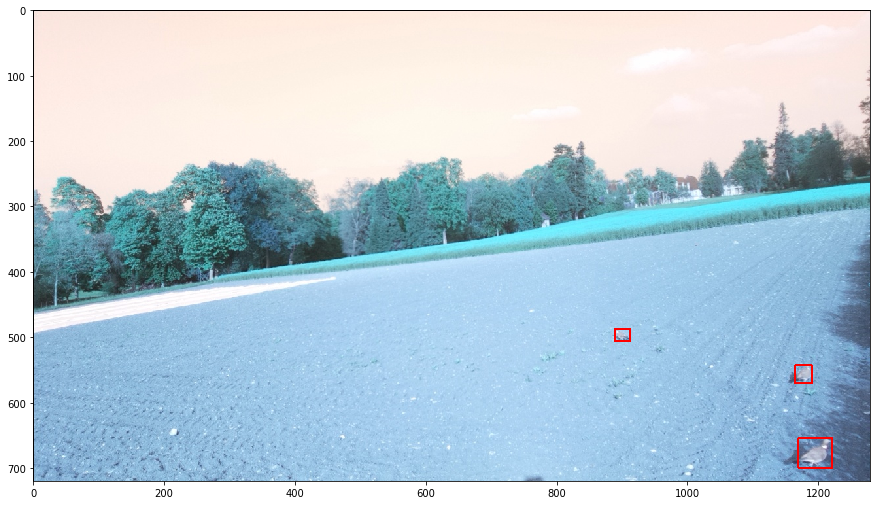

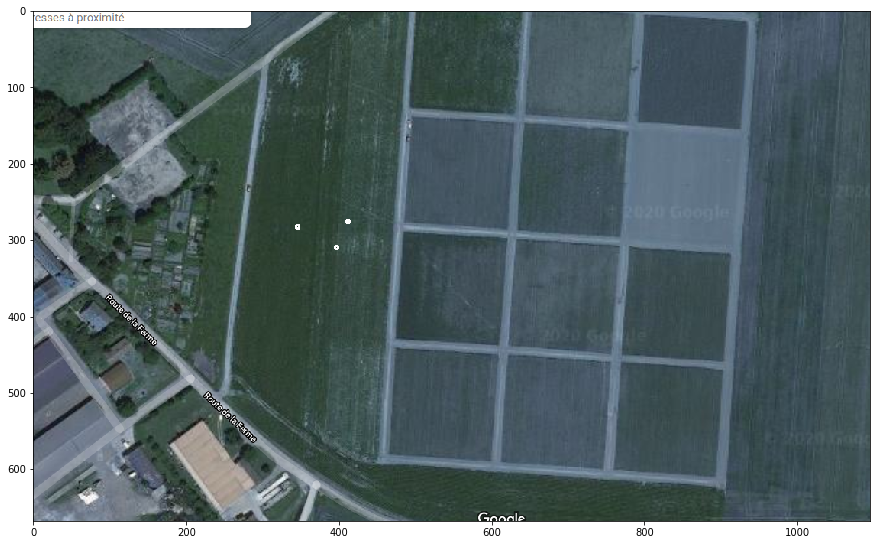

In [66]:

    


#Running function
projection=get_Projection(camera_to_map_convertor_file)




usertest=display_pic(path,color_rectangles)
map_coordonates=apply_projection(usertest,projection)

draw_map(map_coordonates,r)

In [10]:
## Find new type of coordonates

In [11]:
import numpy as np

def get_cartesian(lat=None,lon=None):
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    R = 6371 # radius of the earth
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R *np.sin(lat)
    return x,y,z

In [2]:
get_cartesian(110,220)

(1669.2187571914117, 1400.640843513511, 5986.781687027023)

In [12]:
draw_rectangle(table,color,image_name)

NameError: name 'table' is not defined

In [27]:
    liste_coord=[]
    liste_colors=["White","Red","Blue"]
    
    #Get Centers of birds images
    prem=cv2.imread(path)
    pic_selec=path.split("/")[-1]
    print(pic_selec)
    imagettes_fold=imagettes.copy()
    imagettes_fold=imagettes_fold[imagettes_fold["classe"]!="ground"]
    imagettes_fold=imagettes_fold[imagettes_fold["filename"]==pic_selec]
    imagettes_fold["x_center"]=(imagettes_fold["xmax"]+imagettes_fold["xmin"])/2
    imagettes_fold["y_center"]=(imagettes_fold["ymax"]+imagettes_fold["ymin"])/2
    
    
    #Transform the coordonates in list of list of list
    for line in range(len(imagettes_fold)):
        X=[imagettes_fold["x_center"].iloc[line]]
        Y=[imagettes_fold["y_center"].iloc[line]]
        liste_coord.append([X,Y])
    
    #Plot picture with birds squred
    imageRectangle=prem.copy()
    

image_2019-04-30_18-50-03.jpg


In [36]:
#imagettes_fold.iloc[0]
#draw_rectangle(imagettes_fold,liste_colors[i],imageRectangle)

In [26]:
for i in range(3):
        imageRectangle=draw_rectangle(imagettes_fold,liste_colors[i],imageRectangle)

    plt.figure(figsize=(15,15))
    plt.imshow(imageRectangle);

image_2019-04-30_18-50-03.jpg


AttributeError: 'numpy.int64' object has no attribute 'iloc'

In [60]:
    liste_colors=["White","Red","Blue"]
    #for i in range(3):    
    #for i in range(len(imagettes_fold)):
    for i in range(len(imagettes_fold)):
        xmin=imagettes_fold["xmin"].iloc[i]
        ymin=imagettes_fold["ymin"].iloc[i]
        xmax=imagettes_fold["xmax"].iloc[i]
        ymax=imagettes_fold["ymax"].iloc[i]
        
        color=liste_colors[i]
        print(color)
        if color=="Blue":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (255, 0,0), 2) 
        if color=="Green":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (0, 255,0), 2) 
        if color=="Red":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (0, 0,255), 2)
        if color=="White":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (255, 255,255), 2)
        

White
Red
Blue


In [38]:
        if color=="Blue":
            cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (255, 0,0), 2) 
        if color=="Green":
            cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (0, 255,0), 2) 
        if color=="Red":
            cv2.rectangle(imageRectangle (xmin,ymin), (xmax,ymax), (0, 0,255), 2) 
        if color=="White":
            cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (255, 255,255), 2)
        

NameError: name 'color' is not defined

In [41]:
imagettes_fold.iloc[0]

path                    ./DonneesPI/timeLapsePhotos_Pi1_0
filename                    image_2019-04-30_18-50-03.jpg
width                                                1280
height                                                720
classe                                             pigeon
xmin                                                  889
ymin                                                  487
xmax                                                  913
ymax                                                  506
index                                                6134
imagetteName    image_2019-04-30_18-50-03_pigeon_6134.JPG
x_center                                              901
y_center                                            496.5
Name: 6134, dtype: object

In [71]:
#Start of Function asking for filename
def Projection(userpoints): 
    print('Enter JSON file')                                   
    
#initializing arrays for storing coordinates    
    mapcoord= []
    shotcoord= []

#Commmented out print commands were for checking that data were being read correctly.                                                                               
#This digs into the json to seperate out the map and shot data.
    with open(input()) as json_file:
        data = json.load(json_file)                                                                                                             
        mapdata = (data['map'])
        mapmarkers = (mapdata['markers'])
        shotdata= (data['shot'])
        shotmarkers=(shotdata['markers'])
        #print (mapmarkers)
       
 #This extracts coordinates from json file and puts them in their respective arrays.       
        for p in mapmarkers:
            #print ('Id: ' + p['id'])
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                mapcoord.append(coord)
        #print(mapcoord)
        
        for p in shotmarkers:
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                shotcoord.append(coord)
        #print(shotcoord)
    
# This pairs the lat and lng of the map coordinates
    map_pair=[]
    
    for i in range(0,len(mapcoord),2):
        test=[]
        test.append(mapcoord[i])
        test.append(mapcoord[i+1])
        map_pair.append(test)
    
# This pairs the lat and lng of the shot coordinates    
    shot_pair=[]
    for i in range(0,len(shotcoord),2):
        test=[]
        test.append(shotcoord[i])
        test.append(shotcoord[i+1])
        shot_pair.append(test)
            
#This creates the projection matrix for the transformation       
    projection =  cv2.findHomography(np.float32([shot_pair[:4]]).reshape(4, 1, -1), np.float32([map_pair[:4]]).reshape(4, 1, -1))[0]

#This creates a test projection using the fifth paired map and shot point   
    Testpoint = cv2.perspectiveTransform(np.float32([shot_pair[4]]).reshape(1, 1, -1), projection)
 
#This shows the user the test and the actual point it should map to, so they may check for error  
    print('The following is an actual map point and its projected map point from the shot.\nEnsure that they are acceptable.')
    print(np.float32([map_pair[4]]).reshape(1, 1, -1))
    print(Testpoint)
    
#This projects the user coordinates
    projected_coord=[]
    for i in userpoints:
        user_projection = cv2.perspectiveTransform(np.float32([i]).reshape(1, 1, -1), projection)
        user_projection=user_projection[0]
        user_projection=user_projection[0]
        #print(user_projection)
        projected_coord.extend(user_projection)
        
#This repairs the projected coordinates
    projection_pairs=[]
    for i in range(0,len(projected_coord),2):
        test=[]
        test.append(projected_coord[i])
        test.append(projected_coord[i+1])
        projection_pairs.append(test)    
   
    
    return(projection_pairs)


#Create a projection matrix to learn how to convert camera coordonates into map coordonates
def get_Projection(camera_to_map_convertor_file): 
                                    
#initializing arrays for storing coordinates    
    mapcoord= []
    shotcoord= []

#Commmented out print commands were for checking that data were being read correctly.                                                                               
#This digs into the json to seperate out the map and shot data.
    with open(camera_to_map_convertor_file) as json_file:
        data = json.load(json_file)                                                                                                             
        mapdata = (data['map'])
        mapmarkers = (mapdata['markers'])
        shotdata= (data['shot'])
        shotmarkers=(shotdata['markers'])
        #print (mapmarkers)
       
 #This extracts coordinates from json file and puts them in their respective arrays.       
        for p in mapmarkers:
            #print ('Id: ' + p['id'])
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                mapcoord.append(coord)
        #print(mapcoord)
        
        for p in shotmarkers:
            coords = p['coord']
            for key in coords.items():
                #print (key[0],':', key[1])
                coord=[(key[1])]
                shotcoord.append(coord)
        #print(shotcoord)
    
# This pairs the lat and lng of the map coordinates
    map_pair=[]
    
    for i in range(0,len(mapcoord),2):
        test=[]
        test.append(mapcoord[i])
        test.append(mapcoord[i+1])
        map_pair.append(test)
    
# This pairs the lat and lng of the shot coordinates    
    shot_pair=[]
    for i in range(0,len(shotcoord),2):
        test=[]
        test.append(shotcoord[i])
        test.append(shotcoord[i+1])
        shot_pair.append(test)
            
#This creates the projection matrix for the transformation       
    projection =  cv2.findHomography(np.float32([shot_pair[:4]]).reshape(4, 1, -1), np.float32([map_pair[:4]]).reshape(4, 1, -1))[0]

    return  projection
    
    
#Apply the projection  to a set of points from the camera coordonate to get the map coordonates
def apply_projection(userpoints,projection):
    
    print("les positions en vue caméra sont :",userpoints )
    
#This projects the user coordinates
    projected_coord=[]
    for i in userpoints:
        user_projection = cv2.perspectiveTransform(np.float32([i]).reshape(1, 1, -1), projection)
        user_projection=user_projection[0]
        user_projection=user_projection[0]
        #print(user_projection)
        projected_coord.extend(user_projection)
        
#This repairs the projected coordinates
    projection_pairs=[]
    for i in range(0,len(projected_coord),2):
        test=[]
        test.append(projected_coord[i])
        test.append(projected_coord[i+1])
        projection_pairs.append(test)    
   
    print("les coordonnées en vue aérienne sont : ",projection_pairs)
    return projection_pairs    



def draw_rectangle(imagettes_fold,color,imageRectangle):

    liste_colors=["White","Red","Blue"]
    #for i in range(3):    
    #for i in range(len(imagettes_fold)):
    for i in range(len(imagettes_fold)):
        xmin=imagettes_fold["xmin"].iloc[i]
        ymin=imagettes_fold["ymin"].iloc[i]
        xmax=imagettes_fold["xmax"].iloc[i]
        ymax=imagettes_fold["ymax"].iloc[i]
        
        color=liste_colors[i]
        print(color)
        if color=="Blue":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (255, 0,0), 2) 
        if color=="Green":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (0, 255,0), 2) 
        if color=="Red":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (0, 0,255), 2)
        if color=="White":
            imageRectangle=cv2.rectangle(imageRectangle, (xmin,ymin), (xmax,ymax), (255, 255,255), 2)
        
    return imageRectangle


def display_pic(path,color):
    liste_coord=[]
    liste_colors=["White","Red","Blue"]
    
    #Get Centers of birds images
    prem=cv2.imread(path)
    pic_selec=path.split("/")[-1]
    print(pic_selec)
    imagettes_fold=imagettes.copy()
    imagettes_fold=imagettes_fold[imagettes_fold["classe"]!="ground"]
    imagettes_fold=imagettes_fold[imagettes_fold["filename"]==pic_selec]
    imagettes_fold["x_center"]=(imagettes_fold["xmax"]+imagettes_fold["xmin"])/2
    imagettes_fold["y_center"]=(imagettes_fold["ymax"]+imagettes_fold["ymin"])/2
    
    
    #Transform the coordonates in list of list of list
    for line in range(len(imagettes_fold)):
        X=[imagettes_fold["x_center"].iloc[line]]
        Y=[imagettes_fold["y_center"].iloc[line]]
        liste_coord.append([X,Y])
    
    #Plot picture with birds squred
    imageRectangle=prem.copy()
    
    
    imageRectangle=draw_rectangle(imagettes_fold,liste_colors,imageRectangle)

    plt.figure(figsize=(15,15))
    plt.imshow(imageRectangle);
    
    return liste_coord


def draw_map(map_coordonates,r):
    xmin,xmax,ymin,ymax =[[] for i in range(4)]
    image_map=cv2.imread("/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/positions/SIC.png")
    
    for coord in map_coordonates:
        x_center=round(coord[0])
        y_center=round(coord[1])
        xmin.append(x_center-r)
        xmax.append(x_center+r)
        ymin.append(y_center-r)
        ymax.append(y_center+r)

    df=pd.DataFrame({"xmin":xmin,"xmax":xmax,"ymin":ymin ,"ymax":ymax })
    df=df.astype(int)

    image_map_rect=image_map.copy()    
    image_map_rect=draw_rectangle(df,"White",image_map_rect)
    plt.figure(figsize=(15,15))
    plt.imshow(image_map_rect)



    

image_2019-04-30_18-50-03.jpg
White
Red
Blue
les positions en vue caméra sont : [[[901.0], [496.5]], [[1178.0], [556.0]], [[1196.0], [676.5]]]
les coordonnées en vue aérienne sont :  [[346.449, 283.3761], [411.8171, 275.99216], [396.60443, 309.62384]]
White
Red
Blue


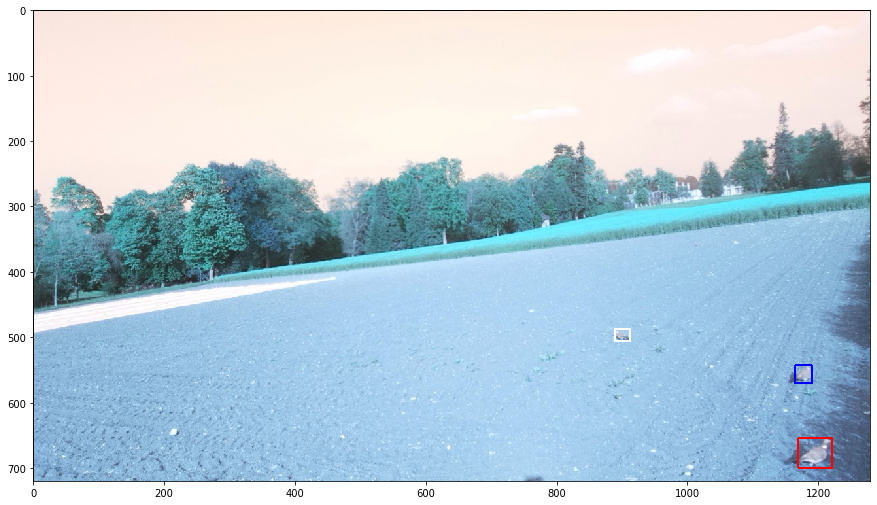

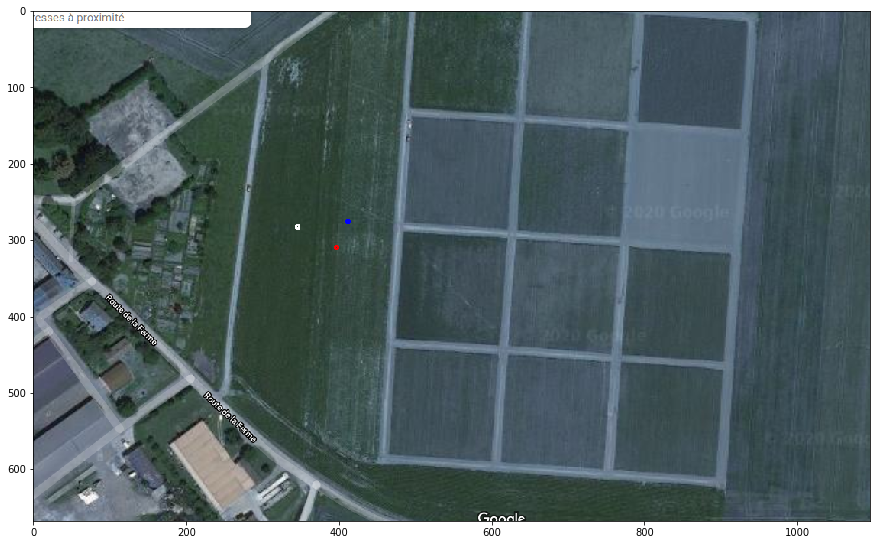

In [72]:

    


#Running function
projection=get_Projection(camera_to_map_convertor_file)




usertest=display_pic(path,color_rectangles)
map_coordonates=apply_projection(usertest,projection)

draw_map(map_coordonates,r)

image_2019-04-06_19-50-02.jpg
White
Red
Blue
les positions en vue caméra sont : [[[208.0], [77.5]], [[182.5], [78.5]], [[172.5], [82.0]]]
les coordonnées en vue aérienne sont :  [[76.73051, 145.31361], [58.8597, 149.44687], [52.060856, 153.69931]]
White
Red
Blue


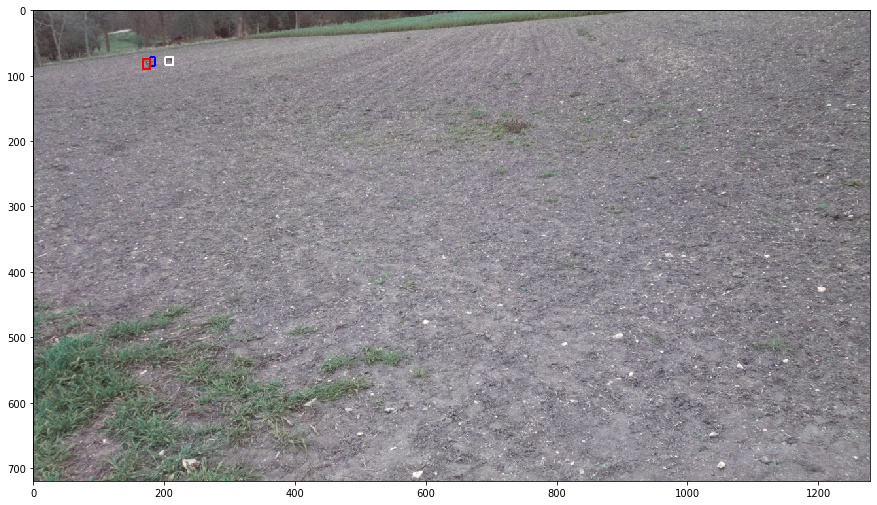

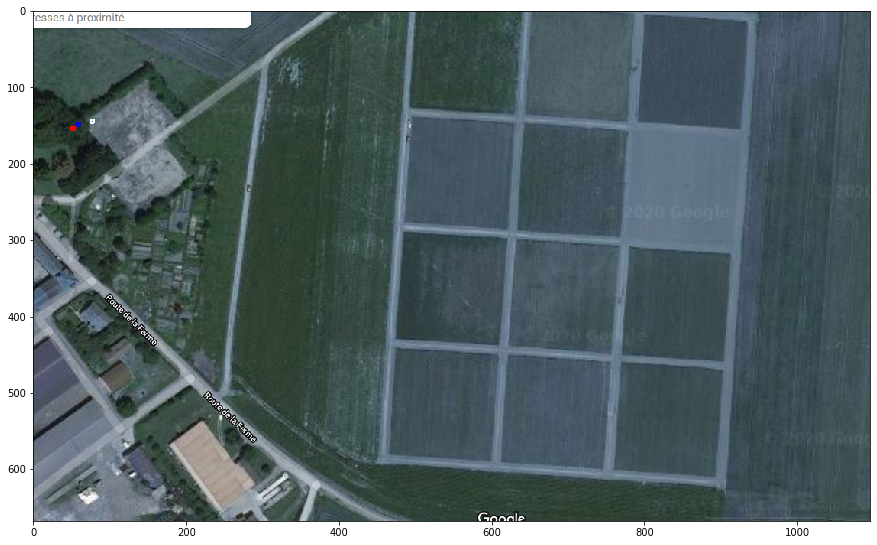

In [75]:

    

path="/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_2/image_2019-04-06_19-50-02.jpg"
#Running function
projection=get_Projection(camera_to_map_convertor_file)




usertest=display_pic(path,color_rectangles)
map_coordonates=apply_projection(usertest,projection)

draw_map(map_coordonates,r)

In [ ]:
#image_2019-04-30_18-54-30.jpg
image_2019-05-29_19-50-43.jpg'

image_2019-04-06_19-50-19.jpg'
image_2019-04-19_17-38-41.jpg
image_2019-04-06_19-50-02.jpg

In [83]:

#from pyproj import Proj
import Proj
import numpy as np
from pandas import DataFrame

core = (-44.6360, -23.2278)

print('\nSampling site lon %s, lat %s\n' % (core[0], core[1]))

x = (529025.00, 529114.00, 545227.00, 545582.00)
y = (7422210.00, 7422343.00, 7435702.00, 7435741.00)

df = DataFrame(np.c_[x, y], columns=['Meters East', 'Meters South'])
df



ModuleNotFoundError: No module named 'Proj'

In [77]:
myProj = Proj("+proj=utm +zone=23K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

NameError: name 'Proj' is not defined